## Web ASR Transactional Data

- Date Range: 2018-01-01 to 2019-12-31
- Selected Customer: All Customer
- Selected Bookings: Booked Only
- Selected Channel: Web Only
- Selected Ship: AL
- Selected RDSS: EST

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/7005773/Desktop/Code/R Code/RCCL/Assets/Outputs/data.classfication.test.csv')
data = data.dropna()
print(data.shape)

(304586, 47)


In [3]:
data.head()
del data['Unnamed: 0']
del data['BOOKING_STATUS_NAME']

In [4]:
print(data.dtypes)

PASSENGER_ID                        int64
PAX_LOYALTY_FLAG                    int64
PAX_AGE                             int64
PAX_IS_KID                          int64
PAX_IS_DRINKING_AGE                 int64
PAX_AGE_UNDER_FOUR                  int64
PAX_AGE_FOUR_TO_SIX                 int64
PAX_AGE_SEVEN_TO_NINE               int64
PAX_AGE_TEN_TO_TWELVE               int64
PAX_AGE_THIRTEEN_SIXTEEN            int64
PAX_AGE_SEVENTEEN_EIGHTEEN          int64
PAX_AGE_NINETEEN_TWENTYONE          int64
PAX_AGE_TWENTYTWO_TWENTYFOUR        int64
PAX_AGE_TWENTYFIVE_THIRTYFOUR       int64
PAX_AGE_THIRTYFIVE_FOURTYFOUR       int64
PAX_AGE_FOURTYFIVE_FIFTYFOUR        int64
PAX_AGE_FIFTYFIVE_SIXTYFOUR         int64
PAX_AGE_SIXTYFIVE_SEVENTYFOUR       int64
PAX_AGE_SEVENTYFIVE_EIGHTYNINE      int64
PAX_AGE_OVER_NINETY                 int64
PAX_GENDER_CODE                    object
PAX_CITIZENSHIP                    object
PAX_ONBOARD_LANGUAGE               object
PAX_DOCUMENTATION_LANGUAGE        

## Data exploration
### Passenger Profile

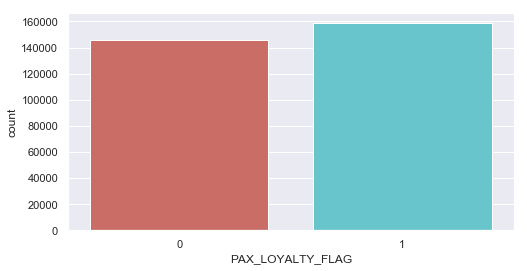

<Figure size 576x288 with 0 Axes>

In [5]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='PAX_LOYALTY_FLAG',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

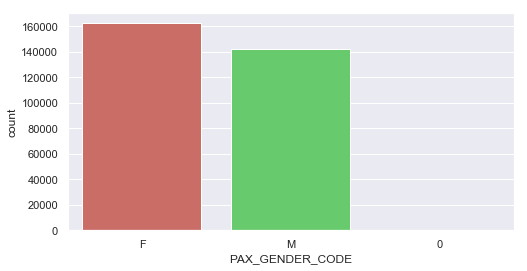

<Figure size 576x288 with 0 Axes>

In [6]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='PAX_GENDER_CODE',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

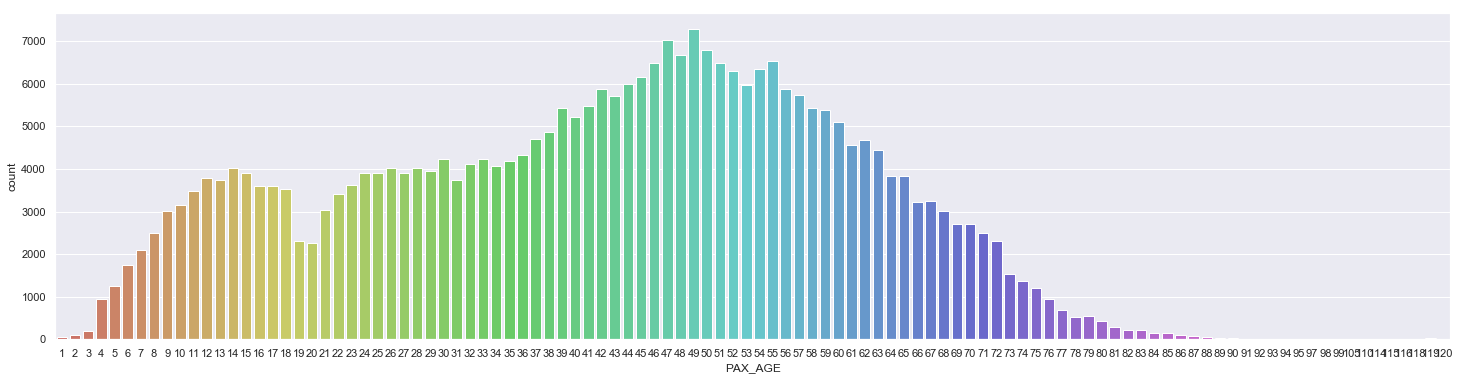

<Figure size 1800x432 with 0 Axes>

In [7]:
sns.set(rc={'figure.figsize':(25,6)})
sns.countplot(x='PAX_AGE',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [8]:
data['PAX_CITIZENSHIP'].value_counts()

USA    254683
CAN     19155
MEX      5842
GBR      5599
NOR      1783
BRA      1515
AUS      1447
DEU      1261
SWE      1245
IRL       904
FIN       795
DNK       761
CHN       721
COL       493
NLD       481
ESP       422
ARG       401
PER       357
ISR       357
CHL       340
ITA       307
IND       301
FRA       277
JPN       275
BMU       251
VEN       214
BHS       212
ECU       212
BEL       203
NZL       189
        ...  
LBN         5
NPL         4
LBR         4
GRD         4
RUS         4
RWA         3
TJK         3
ARM         3
JOR         3
CYM         3
TGO         3
CUR         3
AZE         2
ABW         2
BIH         2
SYC         2
PSE         2
QAT         2
GUF         2
MUS         1
SYR         1
LAO         1
SLE         1
FJI         1
CYP         1
TZA         1
GBD         1
UZB         1
CMR         1
TUN         1
Name: PAX_CITIZENSHIP, Length: 136, dtype: int64

### Cruise Booking Behavior

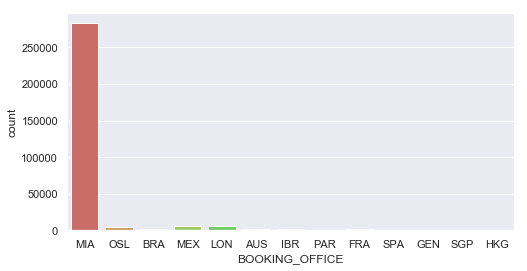

<Figure size 576x288 with 0 Axes>

In [9]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='BOOKING_OFFICE',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

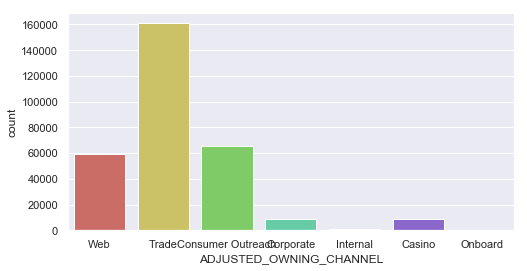

<Figure size 576x288 with 0 Axes>

In [10]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='ADJUSTED_OWNING_CHANNEL',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

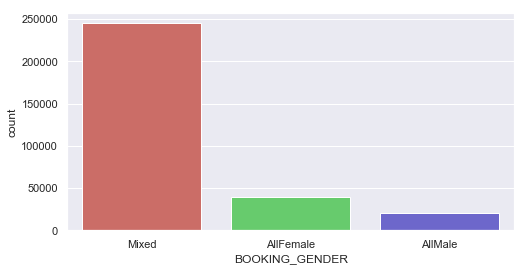

<Figure size 576x288 with 0 Axes>

In [11]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='BOOKING_GENDER',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

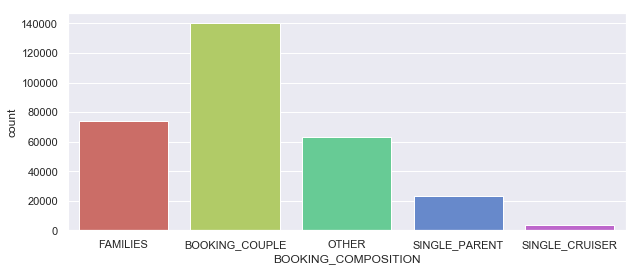

<Figure size 720x288 with 0 Axes>

In [12]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='BOOKING_COMPOSITION',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

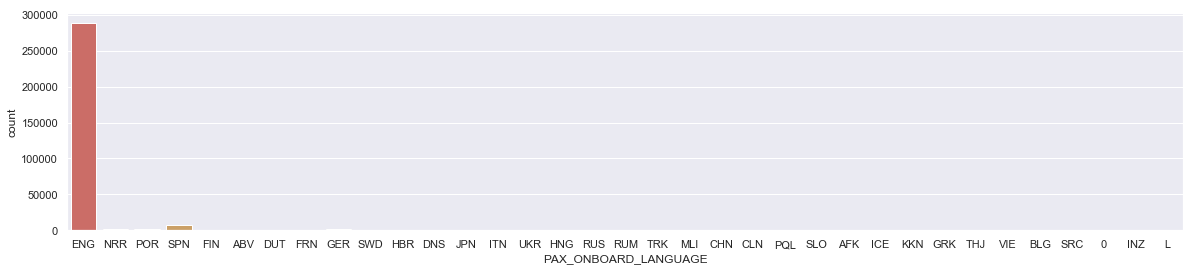

<Figure size 1440x288 with 0 Axes>

In [13]:
sns.set(rc={'figure.figsize':(20,4)})
sns.countplot(x='PAX_ONBOARD_LANGUAGE',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

## Product Booking Behavior

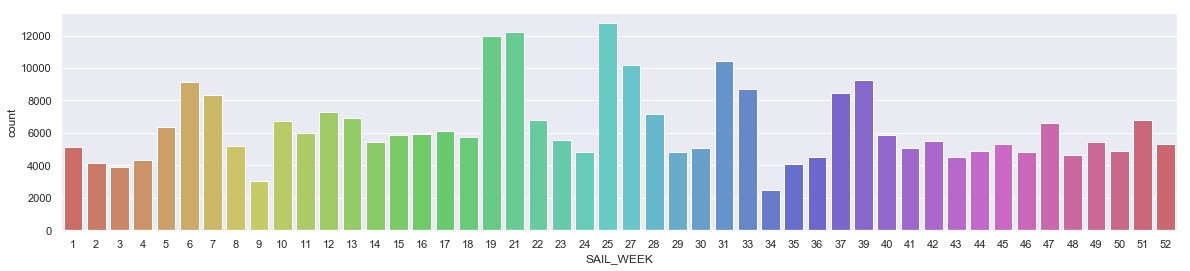

<Figure size 1440x288 with 0 Axes>

In [14]:
sns.set(rc={'figure.figsize':(20,4)})
sns.countplot(x='SAIL_WEEK',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

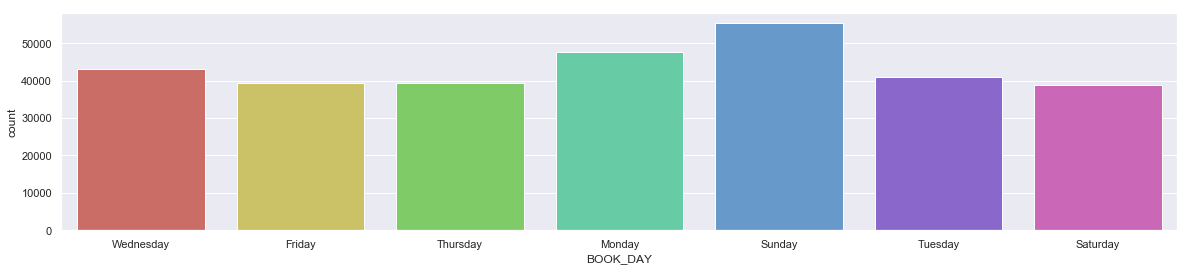

<Figure size 1440x288 with 0 Axes>

In [15]:
sns.set(rc={'figure.figsize':(20,4)})
sns.countplot(x='BOOK_DAY',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

## Passenger Profile by Product

In [16]:
com_count = pd.DataFrame(data['COMPONENT_NAME_ADJ'].value_counts())
com_name = data.groupby('COMPONENT_NAME_ADJ').mean()
com_count.index.name = 'COMPONENT_NAME_ADJ'
com_count.rename(columns = {'COMPONENT_NAME_ADJ':'COMPONENT_NAME_ADJ', 'COMPONENT_NAME_ADJ':'Count'}, inplace = True) 
com_name_total = pd.merge(com_name, com_count, left_on="COMPONENT_NAME_ADJ", right_on="COMPONENT_NAME_ADJ")
com_name_total

,PASSENGER_ID,PAX_LOYALTY_FLAG,PAX_AGE,PAX_IS_KID,PAX_IS_DRINKING_AGE,PAX_AGE_UNDER_FOUR,PAX_AGE_FOUR_TO_SIX,PAX_AGE_SEVEN_TO_NINE,PAX_AGE_TEN_TO_TWELVE,PAX_AGE_THIRTEEN_SIXTEEN,...,BOOKING_DRINKING_ADULTS,BOOKING_NON_DRINKING_ADULTS,BOOKING_COLLEGE_AGE,BOOKING_YOUNGER_THAN_EIGHTEEN,BOOKING_YOUNGER_THAN_THIRTEEN,BOOKING_YOUNGER_THAN_SIX,BOOKING_YOUNGER_THAN_THREE,SAIL_WEEK,BOOK_WEEK,Count
COMPONENT_NAME_ADJ,,,,,,,,,,,,,,,,,,,,,
"""Just to Try"" Acupuncture",3.981754e+08,0.666667,42.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,26.333333,24.333333,3
150 CENTRAL PARK,1.827736e+08,0.601600,47.681067,0.046933,0.936533,0.002133,0.003200,0.004267,0.010133,0.020267,...,0.725867,0.027733,0.016000,0.073600,0.079467,0.038400,0.053867,27.747733,25.043200,1875
3 Night Dining Package,1.818495e+08,0.647159,46.544318,0.063258,0.918182,0.001705,0.002652,0.005303,0.013258,0.031439,...,0.732197,0.032765,0.014773,0.078220,0.085795,0.035985,0.034848,25.595455,24.539583,5280
4 Night Dining Package,1.415139e+08,0.637705,44.545902,0.060656,0.919672,0.000000,0.001639,0.006557,0.011475,0.037705,...,0.685246,0.016393,0.018033,0.068852,0.127869,0.045902,0.045902,24.219672,18.783607,610
4x4 Island Safari and Beach,2.432267e+08,0.529981,38.063830,0.218569,0.748549,0.000000,0.032882,0.056093,0.052224,0.065764,...,0.508704,0.048356,0.009671,0.108317,0.245648,0.096712,0.013540,23.796905,16.663443,517
4x4 St. Maarten and Beach Escape,1.585018e+08,0.487508,41.755285,0.132607,0.835362,0.000000,0.007687,0.021781,0.027546,0.060858,...,0.648943,0.053171,0.017297,0.129404,0.152466,0.023703,0.007687,26.733504,23.904548,1561
5 Night Dining Package,1.810100e+08,0.744063,46.337731,0.036939,0.957784,0.000000,0.000000,0.005277,0.015831,0.010554,...,0.812665,0.005277,0.000000,0.031662,0.071240,0.044855,0.018470,25.767810,22.944591,379
5 Star Island Tour,2.557315e+08,0.426104,47.201536,0.091171,0.895393,0.000000,0.013436,0.023992,0.022073,0.024952,...,0.759117,0.028791,0.005758,0.045106,0.115163,0.032630,0.019194,18.369482,24.077735,1042
9 Chocolate Covered Strawberries,1.913887e+08,0.606164,45.784247,0.051370,0.931507,0.000000,0.006849,0.000000,0.013699,0.023973,...,0.702055,0.054795,0.030822,0.071918,0.123288,0.030822,0.030822,27.592466,29.253425,292


In [17]:
com_name_total.to_csv('/Users/7005773/Desktop/Code/R Code/RCCL/Assets/Outputs/com_name.csv')

In [18]:
pax_loyalty_flag = data.groupby('PAX_LOYALTY_FLAG').mean()
pax_loyalty_flag

,PASSENGER_ID,PAX_AGE,PAX_IS_KID,PAX_IS_DRINKING_AGE,PAX_AGE_UNDER_FOUR,PAX_AGE_FOUR_TO_SIX,PAX_AGE_SEVEN_TO_NINE,PAX_AGE_TEN_TO_TWELVE,PAX_AGE_THIRTEEN_SIXTEEN,PAX_AGE_SEVENTEEN_EIGHTEEN,...,BOOKING_NUM_OF_PAX,BOOKING_DRINKING_ADULTS,BOOKING_NON_DRINKING_ADULTS,BOOKING_COLLEGE_AGE,BOOKING_YOUNGER_THAN_EIGHTEEN,BOOKING_YOUNGER_THAN_THIRTEEN,BOOKING_YOUNGER_THAN_SIX,BOOKING_YOUNGER_THAN_THREE,SAIL_WEEK,BOOK_WEEK
PAX_LOYALTY_FLAG,,,,,,,,,,,,,,,,,,,,,
0,1.739254e+08,36.384959,0.225177,0.73967,0.002103,0.022814,0.042367,0.057831,0.081577,0.034174,...,2.578675,0.520756,0.046581,0.027131,0.124444,0.209967,0.063880,0.041169,25.573448,24.870232
1,1.907840e+08,46.961853,0.052381,0.92887,0.000315,0.003928,0.008901,0.012444,0.021163,0.013441,...,2.382922,0.690080,0.037201,0.016612,0.083064,0.121437,0.039786,0.034301,26.178654,24.062046


# Passenger Product Booking Classification 

In [64]:
data_pass = pd.read_csv('/Users/7005773/Desktop/Code/R Code/RCCL/Assets/Outputs/data.pass.water.csv')
data_pass = data_pass.dropna()
print(data_pass.shape)

(154211, 254)


In [65]:
data_pass.head()
del data_pass['Unnamed: 0']
del data_pass['PASSENGER_ID']

In [66]:
print(data_pass.dtypes)

PAX_LOYALTY_FLAG                                         int64
PAX_AGE                                                  int64
PAX_IS_KID                                               int64
PAX_IS_DRINKING_AGE                                      int64
PAX_AGE_UNDER_FOUR                                       int64
PAX_AGE_FOUR_TO_SIX                                      int64
PAX_AGE_SEVEN_TO_NINE                                    int64
PAX_AGE_TEN_TO_TWELVE                                    int64
PAX_AGE_THIRTEEN_SIXTEEN                                 int64
PAX_AGE_SEVENTEEN_EIGHTEEN                               int64
PAX_AGE_NINETEEN_TWENTYONE                               int64
PAX_AGE_TWENTYTWO_TWENTYFOUR                             int64
PAX_AGE_TWENTYFIVE_THIRTYFOUR                            int64
PAX_AGE_THIRTYFIVE_FOURTYFOUR                            int64
PAX_AGE_FOURTYFIVE_FIFTYFOUR                             int64
PAX_AGE_FIFTYFIVE_SIXTYFOUR                            

In [67]:
len(data_pass.columns)

252

In [68]:
data_pass_vars = data_pass.columns.values.tolist()
y = ['COMPONENT_NAME_ADJ_Thrill Waterpark Full Day Pass E']
X = [i for i in data_pass_vars if i not in y]

### Feature Selection

In [69]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [70]:
data_pass.describe()

,PAX_LOYALTY_FLAG,PAX_AGE,PAX_IS_KID,PAX_IS_DRINKING_AGE,PAX_AGE_UNDER_FOUR,PAX_AGE_FOUR_TO_SIX,PAX_AGE_SEVEN_TO_NINE,PAX_AGE_TEN_TO_TWELVE,PAX_AGE_THIRTEEN_SIXTEEN,PAX_AGE_SEVENTEEN_EIGHTEEN,...,ADJUSTED_OWNING_CHANNEL_Trade,ADJUSTED_OWNING_CHANNEL_Web,BOOKING_GENDER_AllFemale,BOOKING_GENDER_AllMale,BOOKING_GENDER_Mixed,BOOKING_COMPOSITION_BOOKING_COUPLE,BOOKING_COMPOSITION_FAMILIES,BOOKING_COMPOSITION_OTHER,BOOKING_COMPOSITION_SINGLE_CRUISER,BOOKING_COMPOSITION_SINGLE_PARENT
count,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,...,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000,154211.000000
mean,0.518880,41.967551,0.142590,0.830077,0.001906,0.015758,0.027138,0.034796,0.051157,0.023442,...,0.547023,0.172011,0.128123,0.070812,0.801065,0.450480,0.247401,0.210925,0.012606,0.078587
std,0.499645,18.827461,0.349656,0.375566,0.043622,0.124537,0.162486,0.183265,0.220319,0.151303,...,0.497786,0.377391,0.334228,0.256511,0.399200,0.497543,0.431503,0.407967,0.111567,0.269094
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
scaler = StandardScaler()
print(scaler.fit(data_pass))
print(scaler.mean_)
data_pass_scale = scaler.transform(data_pass)
data_pass_scale = pd.DataFrame(data_pass_scale, columns = data_pass.columns) 

StandardScaler(copy=True, with_mean=True, with_std=True)
[5.18879976e-01 4.19675510e+01 1.42590347e-01 8.30076972e-01
 1.90647879e-03 1.57576308e-02 2.71381419e-02 3.47964801e-02
 5.11571807e-02 2.34419075e-02 2.61395102e-02 3.50558650e-02
 1.27552509e-01 1.65578331e-01 2.06107217e-01 1.67770133e-01
 9.51488545e-02 2.19763830e-02 4.73377386e-04 1.01773353e+03
 2.49187801e+00 5.99081778e-01 4.26558417e-02 2.15289441e-02
 1.03267601e-01 1.64437038e-01 5.50155307e-02 4.14561867e-02
 2.58338705e+01 1.65941470e-02 1.29692434e-05 4.53923520e-05
 2.59384869e-05 1.77030173e-03 1.94538652e-05 4.50681210e-03
 4.02046547e-04 1.29692434e-05 6.61431415e-04 3.24231086e-05
 5.18769738e-05 7.00339146e-04 6.48462172e-06 5.83615955e-05
 5.25254359e-04 1.55630921e-04 6.21226761e-03 1.16723191e-04
 7.05267458e-02 1.54982459e-03 2.32149458e-03 6.03069820e-04
 6.48462172e-06 1.95835576e-03 4.21500412e-04 6.35492929e-04
 1.29692434e-05 1.29692434e-05 6.48462172e-06 1.03753948e-04
 1.03753948e-04 4.05288857e-

In [72]:
data_pass_scale.replace([np.inf, -np.inf], np.nan, inplace=True)
data_pass_scale.T.fillna(data_pass.mean().T, inplace=True)
data_pass_scale.isnull().values.any()

False

In [73]:
data_pass_scale.isnull().sum()

PAX_LOYALTY_FLAG                                       0
PAX_AGE                                                0
PAX_IS_KID                                             0
PAX_IS_DRINKING_AGE                                    0
PAX_AGE_UNDER_FOUR                                     0
PAX_AGE_FOUR_TO_SIX                                    0
PAX_AGE_SEVEN_TO_NINE                                  0
PAX_AGE_TEN_TO_TWELVE                                  0
PAX_AGE_THIRTEEN_SIXTEEN                               0
PAX_AGE_SEVENTEEN_EIGHTEEN                             0
PAX_AGE_NINETEEN_TWENTYONE                             0
PAX_AGE_TWENTYTWO_TWENTYFOUR                           0
PAX_AGE_TWENTYFIVE_THIRTYFOUR                          0
PAX_AGE_THIRTYFIVE_FOURTYFOUR                          0
PAX_AGE_FOURTYFIVE_FIFTYFOUR                           0
PAX_AGE_FIFTYFIVE_SIXTYFOUR                            0
PAX_AGE_SIXTYFIVE_SEVENTYFOUR                          0
PAX_AGE_SEVENTYFIVE_EIGHTYNINE 

In [74]:
import warnings
warnings.filterwarnings("ignore")
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(data_pass_scale[y])
print(y)

[0 0 0 ... 0 0 0]


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(data_pass_scale[X],y)
## print(model.feature_importances_)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), 
                 data_pass_scale[X]), reverse=True))

Features sorted by their score:
[(0.2795, 'SAIL_WEEK'), (0.2609, 'NET_TICKET_REVENUE_USD'), (0.1459, 'PAX_AGE'), (0.036, 'BOOKING_NUM_OF_PAX'), (0.0175, 'PAX_LOYALTY_FLAG'), (0.0153, 'RATE_CAT_CLASS_B'), (0.0135, 'RATE_CAT_CLASS_I'), (0.0127, 'RATE_CAT_CLASS_N'), (0.0127, 'ADJUSTED_OWNING_CHANNEL_Trade'), (0.0112, 'TKT_DIGITAL_CHANNEL_Non-Digital'), (0.0103, 'PAX_GENDER_CODE_F'), (0.0102, 'PAX_GENDER_CODE_M'), (0.01, 'TKT_DIGITAL_CHANNEL_Digital'), (0.0088, 'ADJUSTED_OWNING_CHANNEL_Web'), (0.0088, 'ADJUSTED_OWNING_CHANNEL_Consumer Outreach'), (0.0073, 'RATE_CAT_CLASS_O'), (0.0072, 'BOOKING_YOUNGER_THAN_THIRTEEN'), (0.0069, 'BOOKING_COMPOSITION_OTHER'), (0.006, 'BOOKING_GENDER_Mixed'), (0.0056, 'PAX_CITIZENSHIP_USA'), (0.0051, 'PAX_AGE_FOURTYFIVE_FIFTYFOUR'), (0.0047, 'BOOKING_GENDER_AllFemale'), (0.0045, 'RATE_CAT_CLASS_D'), (0.0044, 'BOOKING_COMPOSITION_FAMILIES'), (0.0043, 'PAX_CITIZENSHIP_CAN'), (0.0042, 'PAX_AGE_TWENTYFIVE_THIRTYFOUR'), (0.0042, 'PAX_AGE_THIRTYFIVE_FOURTYFOUR'), (0

In [76]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, verbose=3)
rft = rf.fit(data_pass_scale[X],y)
## print(rft.feature_importances_)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rft.feature_importances_), 
                 data_pass_scale[X]), reverse=True))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100building tree 8 of 100



building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100building tree 61 of 100

building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.1s finished


Features sorted by their score:
[(0.2533, 'NET_TICKET_REVENUE_USD'), (0.1856, 'SAIL_WEEK'), (0.1547, 'PAX_AGE'), (0.0385, 'BOOKING_YOUNGER_THAN_THIRTEEN'), (0.0235, 'PAX_LOYALTY_FLAG'), (0.0235, 'BOOKING_NUM_OF_PAX'), (0.0198, 'RATE_CAT_CLASS_B'), (0.016, 'RATE_CAT_CLASS_I'), (0.015, 'RATE_CAT_CLASS_N'), (0.0144, 'ADJUSTED_OWNING_CHANNEL_Trade'), (0.0141, 'ADJUSTED_OWNING_CHANNEL_Consumer Outreach'), (0.0135, 'ADJUSTED_OWNING_CHANNEL_Web'), (0.0131, 'PAX_GENDER_CODE_F'), (0.0129, 'PAX_GENDER_CODE_M'), (0.012, 'TKT_DIGITAL_CHANNEL_Digital'), (0.0113, 'TKT_DIGITAL_CHANNEL_Non-Digital'), (0.0102, 'BOOKING_COMPOSITION_OTHER'), (0.0089, 'RATE_CAT_CLASS_D'), (0.0086, 'RATE_CAT_CLASS_O'), (0.0074, 'PAX_AGE_THIRTYFIVE_FOURTYFOUR'), (0.0074, 'BOOKING_DRINKING_ADULTS'), (0.0072, 'BOOKING_COMPOSITION_BOOKING_COUPLE'), (0.0071, 'BOOKING_GENDER_Mixed'), (0.0067, 'PAX_CITIZENSHIP_USA'), (0.0064, 'BOOKING_YOUNGER_THAN_SIX'), (0.0063, 'BOOKING_GENDER_AllMale'), (0.0059, 'BOOKING_GENDER_AllFemale'), (0

In [85]:
cols=['NET_TICKET_REVENUE_USD',
 'SAIL_WEEK',
 'PAX_AGE',
 'BOOKING_YOUNGER_THAN_THIRTEEN',
 'PAX_LOYALTY_FLAG',
 'BOOKING_NUM_OF_PAX',
 'RATE_CAT_CLASS_B',
 'RATE_CAT_CLASS_I',
 'RATE_CAT_CLASS_N',
 'ADJUSTED_OWNING_CHANNEL_Trade',
 'ADJUSTED_OWNING_CHANNEL_Consumer Outreach',
 'ADJUSTED_OWNING_CHANNEL_Web',
 'PAX_GENDER_CODE_F',
 'PAX_GENDER_CODE_M',
 'TKT_DIGITAL_CHANNEL_Digital',
 'TKT_DIGITAL_CHANNEL_Non-Digital',
 'BOOKING_COMPOSITION_OTHER',
 'RATE_CAT_CLASS_D',
 'RATE_CAT_CLASS_O',
 'PAX_AGE_THIRTYFIVE_FOURTYFOUR',
 'BOOKING_DRINKING_ADULTS',
 'BOOKING_COMPOSITION_BOOKING_COUPLE',
 'BOOKING_GENDER_Mixed',
 'PAX_CITIZENSHIP_USA',
 'BOOKING_YOUNGER_THAN_SIX',
 'BOOKING_GENDER_AllMale',
 'BOOKING_GENDER_AllFemale',
 'PAX_CITIZENSHIP_CAN',
 'ADJUSTED_OWNING_CHANNEL_Casino',
 'PAX_AGE_FOURTYFIVE_FIFTYFOUR',
 'BOOKING_COMPOSITION_FAMILIES',
 'BOOKING_COMPOSITION_SINGLE_PARENT',
 'PAX_AGE_TWENTYFIVE_THIRTYFOUR',
 'BOOKING_YOUNGER_THAN_EIGHTEEN',
 'BOOKING_YOUNGER_THAN_THREE',
 'PAX_AGE_THIRTEEN_SIXTEEN',
 'PAX_AGE_FIFTYFIVE_SIXTYFOUR',
 'PAX_AGE_TEN_TO_TWELVE',
 'BOOKING_OFFICE_IBR',
 'PAX_AGE_SEVEN_TO_NINE',
 'PAX_CITIZENSHIP_BRA',
 'PAX_AGE_TWENTYTWO_TWENTYFOUR',
 'BOOKING_NON_DRINKING_ADULTS',
 'PAX_IS_KID',
 'PAX_IS_DRINKING_AGE',
 'PAX_AGE_SEVENTEEN_EIGHTEEN',
 'PAX_ONBOARD_LANGUAGE_ENG',
 'ADJUSTED_OWNING_CHANNEL_Corporate',
 'PAX_AGE_SIXTYFIVE_SEVENTYFOUR',
 'BOOKING_OFFICE_MIA',
 'BOOKING_COMPOSITION_SINGLE_CRUISER',
 'ADJUSTED_OWNING_CHANNEL_Internal',
 'PAX_AGE_NINETEEN_TWENTYONE',
 'BOOKING_OFFICE_LON',
 'PAX_CITIZENSHIP_GBR',
 'PAX_CITIZENSHIP_CHN',
 'PAX_CITIZENSHIP_AUS',
 'BOOKING_COLLEGE_AGE',
 'PAX_CITIZENSHIP_CHL',
 'PAX_ONBOARD_LANGUAGE_FIN',
 'PAX_CITIZENSHIP_UKR',
 'PAX_CITIZENSHIP_ISL',
 'PAX_CITIZENSHIP_FIN',
 'BOOKING_OFFICE_OSL',
 'PAX_ONBOARD_LANGUAGE_NRR',
 'PAX_CITIZENSHIP_ECU',
 'PAX_CITIZENSHIP_ARG',
 'PAX_AGE_FOUR_TO_SIX',
 'BOOKING_OFFICE_AUS',
 'PAX_ONBOARD_LANGUAGE_SPN',
 'PAX_DOCUMENTATION_LANGUAGE_POR',
 'PAX_DOCUMENTATION_LANGUAGE_ENG',
 'PAX_CITIZENSHIP_VEN',
 'BOOKING_OFFICE_MEX',
 'PAX_ONBOARD_LANGUAGE_HBR',
 'PAX_CITIZENSHIP_SWE',
 'PAX_CITIZENSHIP_MEX',
 'PAX_AGE_SEVENTYFIVE_EIGHTYNINE',
 'BOOKING_OFFICE_PAR',
 'BOOKING_OFFICE_BRA',
 'PAX_ONBOARD_LANGUAGE_TRK',
 'PAX_ONBOARD_LANGUAGE_SWD',
 'PAX_ONBOARD_LANGUAGE_POR',
 'PAX_ONBOARD_LANGUAGE_FRN',
 'PAX_DOCUMENTATION_LANGUAGE_SPN',
 'PAX_CITIZENSHIP_TUR',
 'PAX_CITIZENSHIP_ISR',
 'PAX_CITIZENSHIP_FRA',
 'PAX_AGE_OVER_NINETY',
 'PAX_ONBOARD_LANGUAGE_GER',
 'PAX_CITIZENSHIP_PER',
 'PAX_CITIZENSHIP_PAN',
 'PAX_CITIZENSHIP_NOR',
 'PAX_CITIZENSHIP_DOM',
 'PAX_CITIZENSHIP_DEU',
 'PAX_AGE_UNDER_FOUR',
 'BOOKING_OFFICE_FRA',
 'PAX_DOCUMENTATION_LANGUAGE_GER',
 'PAX_DOCUMENTATION_LANGUAGE_FRN',
 'PAX_CITIZENSHIP_ESP',
 'PAX_CITIZENSHIP_COL',
] 
X=data_pass_scale[cols]
y=y

### Implementing the model

In [86]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.692620
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               154211
Model:                          Logit   Df Residuals:                   154115
Method:                           MLE   Df Model:                           95
Date:                Fri, 24 Jan 2020   Pseudo R-squ.:                  -7.200
Time:                        14:02:30   Log-Likelihood:            -1.0681e+05
converged:                      False   LL-Null:                       -13026.
                                        LLR p-value:                     1.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
NET_TICKET_REVENUE_USD                       -0.0010      0.006     -0.161      0.

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [80]:
y_pred = logreg.predict(X_test)

In [81]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


### Cross Validation

In [87]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.983


### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[46252     0]
 [   12     0]]


#### Accuracy

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46252
           1       0.00      0.00      0.00        12

   micro avg       1.00      1.00      1.00     46264
   macro avg       0.50      0.50      0.50     46264
weighted avg       1.00      1.00      1.00     46264



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

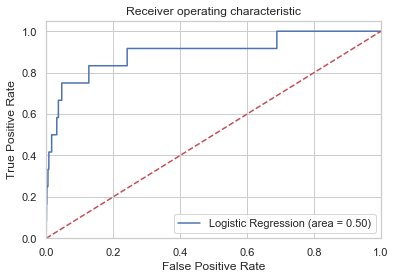

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()